In [1]:
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

In [2]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv')['Lung Cancer']

X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv')['Lung Cancer']
print("test")

test


In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Initialize Random Forest Regression model
model = RandomForestRegressor(n_estimators=50, random_state=156, max_features=25)

sfs_backward = SFS(model, 
                   k_features=10, 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Selected Features
selected_features_backward = X_train.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_backward)
print('Score',sfs_backward.k_score_)

pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

Selected features in Backward Selection: Index(['PM2.5', 'Sociod_EQI', 'CLU50_1', 'SO2', 'NO2', 'O3', 'CO', 'Air_EQI',
       'Water_EQI', 'smoking_data'],
      dtype='object')
Score -119.6200129040964


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-148.64884949397586, -122.40860521445784, -97...",-123.78805,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",20.744505,16.139929,8.069965
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-143.95482067469874, -121.77773647228915, -98...",-122.399308,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",18.466889,14.367867,7.183934
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...","[-143.5575907469879, -121.91546767228918, -94....",-122.302359,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",20.349614,15.832691,7.916346
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...","[-141.92158332530116, -122.17967773493974, -91...",-120.837281,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",21.033008,16.364395,8.182197
15,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[-142.13375687710837, -121.14222317108434, -93...",-120.168765,"(PM2.5, Land_EQI, Sociod_EQI, CLU50_1, PM10, S...",20.07064,15.61564,7.80782
14,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16)","[-142.07381747469873, -119.380500626506, -92.7...",-119.897372,"(PM2.5, Land_EQI, Sociod_EQI, CLU50_1, PM10, S...",20.268069,15.769246,7.884623
13,"(0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16)","[-140.0286305542168, -121.33875079518072, -92....",-119.046578,"(PM2.5, Land_EQI, Sociod_EQI, CLU50_1, SO2, NO...",19.844225,15.439481,7.719741
12,"(0, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16)","[-140.5019752963855, -121.12163113253013, -92....",-119.425791,"(PM2.5, Sociod_EQI, CLU50_1, SO2, NO2, O3, CO,...",19.78933,15.396771,7.698386
11,"(0, 2, 4, 6, 7, 8, 9, 11, 13, 14, 16)","[-142.43057373493968, -120.26537691566266, -92...",-119.496117,"(PM2.5, Sociod_EQI, CLU50_1, SO2, NO2, O3, CO,...",20.609684,16.035034,8.017517
10,"(0, 2, 4, 6, 7, 8, 9, 13, 14, 16)","[-143.96584968674694, -119.15753906506022, -92...",-119.620013,"(PM2.5, Sociod_EQI, CLU50_1, SO2, NO2, O3, CO,...",20.874789,16.241295,8.120647


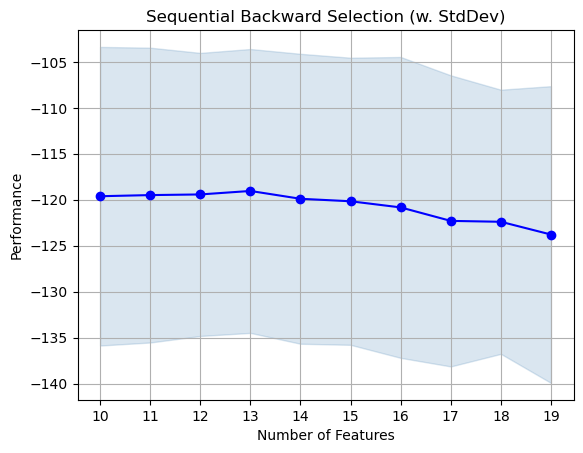

In [4]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [6]:
if 'Unnamed: 0' in X_test.columns:
    X_test.drop(columns=['Unnamed: 0'], inplace=True)

X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]     

model.fit(X_train, y_train)
preds = model.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 104.80846647398846
Mean Absolute Error: 8.060065510597303
R-squared Score: 0.6418520293950221


In [7]:
from sklearn.model_selection import RepeatedKFold

X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]

repeatkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

np.mean(cross_val_score(model, X_train, y_train, cv=repeatkf, n_jobs=-1))

0.5931599212112292

In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': np.arange(5,30,5),
    'n_estimators': np.arange(50,210,50)
}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'max_depth': 20, 'n_estimators': 100}
Test set score of the best model: 0.6427226492394749


In [9]:
clf_best = grid_search.best_estimator_
y_test_pred = clf_best.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 104.55368817488267
Mean Absolute Error: 8.03885244531092
R-squared Score: 0.6427226492394749
